In [1]:
## import os
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt


## Read in water use shapefile with average and max pumping rates
### Fields:

__ID_Well__ = Site ID in NWIS and placeholders where not avalable (i.e. well_0, well_1, etc.)

__Type__ = Type of well (all groundwater)

__DEC_ID__ = WWR# (obtained this from SWUDS)

__X__ = Longitude (NAD83)

__Y__ = Latitude (NAD83)

__Location_C__ = Location of well, or in situations where well location is unknown, defaulted to factility location.

__Avg_Mdg__ = 2010-2015 average pumpaging per well, in MGD. Pumping rates were obtained by distributing total facility pumpage amongst all wells within facility (Percentage determined by well capacities)

__Well_Depth__ = Well depth, in feet

__NWIS_Link__ = Well number in NWIS (these may not be 100% accurate)

__NWIS_ID__ = Site ID in NWIS (these may not be 100% accurate)

__WellDMeter__ = Well depth, in meters

__Stop_Meter__ = Screen top elevation, in meters

__Sbot_Meter__ = Screen bottom elevation, in meters

__Comments__ = Any comments pertinent to the well

__RASTERVALU__ = Lidar elevation of well, in meters

__WellType__ = Priority (as identified by DEC), Not priority (as identified by DEC), and Other (additional pumping wells from SWUDS)

__Max_Rate__ = is the well capacity in gallons per day

__MaxR_Units__ = MaxR_Units, gallons per day

__M_Rate_MGD__ = Max_Rate in units of million gallons per day

In [2]:
wu_file = '../source_data/Shapefiles/WaterUse/wells_max_rates_and_ids.shp' # water use shapefile
gdf = gp.read_file(wu_file)

In [3]:
gdf

,OBJECTID,Type,DEC_ID,X,Y,Avg_Mgd,Well_Depth,NWIS_ID,WellDMeter,Stop_Meter,Sbot_Meter,Comments,RASTERVALU,WellType,Max_Rate,MaxR_Units,M_Rate_MGD,ID_Well,geometry
0,4,GROUND,WWR0000209,-74.567125,41.781703,0.000287,500.0,None,152.4000,0.000000,0.000000,Bedrock well according to SWUDS,448.7470,Other,13824.0,GPD,0.013824,well_0,POINT (1753754.300 2285095.106)
1,5,GROUND,WWR0000209,-74.567125,41.781703,0.000255,620.0,None,188.9760,0.000000,0.000000,Bedrock well according to SWUDS,448.7470,Other,12240.0,GPD,0.012240,well_1,POINT (1753754.300 2285095.106)
2,6,GROUND,WWR0000209,-74.567101,41.781703,0.001364,450.0,None,137.1600,0.000000,0.000000,Bedrock well according to SWUDS,448.7360,Other,64800.0,GPD,0.064800,well_2,POINT (1753756.238 2285095.540)
3,7,GROUND,WWR0000209,-74.567101,41.781703,0.001212,425.0,None,129.5400,0.000000,0.000000,Bedrock well according to SWUDS,448.7360,Other,57600.0,GPD,0.057600,well_3,POINT (1753756.238 2285095.540)
4,9,GROUND,WWR0000401,-74.590254,41.702977,0.016090,52.0,414210074352501,15.8496,326.255956,323.207956,Screen in L3 - Kame,339.0580,Priority,108000.0,GPD,0.108000,SV_193,POINT (1753861.709 2276081.978)
5,10,GROUND,WWR0000401,-74.599206,41.694179,0.049721,92.0,414138074355701,28.0416,313.148000,310.100000,Screen in L1,337.7930,Priority,331200.0,GPD,0.331200,SV_227,POINT (1753360.653 2274957.212)
6,11,GROUND,WWR0000479,-74.389708,41.712790,0.062289,60.0,414212074233001,18.2880,81.428518,78.380518,Screen in L2 - Lacustrine sand,96.6685,Priority,190000.0,GPD,0.190000,U__55,POINT (1769759.859 2280869.990)
7,12,GROUND,WWR0000479,-74.391157,41.704287,0.262649,35.0,414210074233601,10.6680,92.268603,89.220603,Screen in L1 and L2 - Alluvium/Kame,99.8886,Priority,720000.0,GPD,0.720000,U_917,POINT (1769857.736 2279916.021)
8,13,GROUND,WWR0000479,-74.392171,41.703690,0.140092,58.0,414212074233201,17.6784,85.277689,82.229689,Screen in L2 - Kame,99.9081,Priority,720000.0,GPD,0.720000,U___7,POINT (1769791.180 2279832.052)
9,14,GROUND,WWR0000479,-74.392097,41.703732,0.297580,75.0,414201074230201,22.8600,80.428959,77.380959,Screen in L2 - Kame,100.2410,Priority,880000.0,GPD,0.880000,U___8,POINT (1769796.077 2279838.009)


### Plot with basin boundary just to verify locations

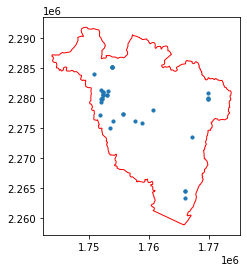

In [4]:
boundary = gp.read_file('../source_data/Shapefiles/Extents/Model_Extent_HUC12.shp')

fig, ax = plt.subplots()
gdf.plot(ax=ax, markersize=10)
boundary.plot(ax=ax, facecolor='none', edgecolor='red')
plt.show()

###  Processing steps for `modflow-setup` input file
* add columns with projected x-y from geometry column
* add top of screen elevation above model
* add bottom of screen elevation = 0 m
* add start and end dates -- these dates are arbitrary

**want columns: node, screen_top, screen_botm, flux_m3, start_datetime, end_datetime, x, y**

In [5]:
well_df = gdf.copy()

In [6]:
well_df['x'] = [coord.x for coord in gdf.geometry]
well_df['y'] = [coord.y for coord in gdf.geometry]

In [7]:
well_df.loc[(well_df.Stop_Meter == 0) & (well_df.Sbot_Meter == 0), 'Stop_Meter' ] = 2000
well_df.loc[(well_df.Stop_Meter == 2000) & (well_df.Sbot_Meter == 0), 'Sbot_Meter' ] = -2000

In [8]:
well_df.head()

,OBJECTID,Type,DEC_ID,X,Y,Avg_Mgd,Well_Depth,NWIS_ID,WellDMeter,Stop_Meter,...,Comments,RASTERVALU,WellType,Max_Rate,MaxR_Units,M_Rate_MGD,ID_Well,geometry,x,y
0,4,GROUND,WWR0000209,-74.567125,41.781703,0.000287,500.0,None,152.4000,2000.000000,...,Bedrock well according to SWUDS,448.747,Other,13824.0,GPD,0.013824,well_0,POINT (1753754.300 2285095.106),1.753754e+06,2.285095e+06
1,5,GROUND,WWR0000209,-74.567125,41.781703,0.000255,620.0,None,188.9760,2000.000000,...,Bedrock well according to SWUDS,448.747,Other,12240.0,GPD,0.012240,well_1,POINT (1753754.300 2285095.106),1.753754e+06,2.285095e+06
2,6,GROUND,WWR0000209,-74.567101,41.781703,0.001364,450.0,None,137.1600,2000.000000,...,Bedrock well according to SWUDS,448.736,Other,64800.0,GPD,0.064800,well_2,POINT (1753756.238 2285095.540),1.753756e+06,2.285096e+06
3,7,GROUND,WWR0000209,-74.567101,41.781703,0.001212,425.0,None,129.5400,2000.000000,...,Bedrock well according to SWUDS,448.736,Other,57600.0,GPD,0.057600,well_3,POINT (1753756.238 2285095.540),1.753756e+06,2.285096e+06
4,9,GROUND,WWR0000401,-74.590254,41.702977,0.016090,52.0,414210074352501,15.8496,326.255956,...,Screen in L3 - Kame,339.058,Priority,108000.0,GPD,0.108000,SV_193,POINT (1753861.709 2276081.978),1.753862e+06,2.276082e+06


##### confirming units because Mars rovers
$\frac{MG}{d} --> \frac{m^3}{d}$  

$\frac{m^3}{d} = MGD \times \frac{1Mg}{d} \times\frac{g}{1M} \times \frac{.00378541 m^3}{g}$  

$\frac{MG}{d} --> \frac{m^3}{d} mult = .00378541 \times 1e6 = 3785.41$  

In [9]:
well_df['flux_m3'] = [i for i in well_df.Avg_Mgd * (-3785.41)]  #  convert average flux to cubic meters per day
well_df['max_flux_m3'] = [i for i in well_df.M_Rate_MGD * (-3785.41)]  #  convert max flux to cubic meters per day

well_df

,OBJECTID,Type,DEC_ID,X,Y,Avg_Mgd,Well_Depth,NWIS_ID,WellDMeter,Stop_Meter,...,WellType,Max_Rate,MaxR_Units,M_Rate_MGD,ID_Well,geometry,x,y,flux_m3,max_flux_m3
0,4,GROUND,WWR0000209,-74.567125,41.781703,0.000287,500.0,None,152.4000,2000.000000,...,Other,13824.0,GPD,0.013824,well_0,POINT (1753754.300 2285095.106),1.753754e+06,2.285095e+06,-1.087965,-52.329508
1,5,GROUND,WWR0000209,-74.567125,41.781703,0.000255,620.0,None,188.9760,2000.000000,...,Other,12240.0,GPD,0.012240,well_1,POINT (1753754.300 2285095.106),1.753754e+06,2.285095e+06,-0.964004,-46.333418
2,6,GROUND,WWR0000209,-74.567101,41.781703,0.001364,450.0,None,137.1600,2000.000000,...,Other,64800.0,GPD,0.064800,well_2,POINT (1753756.238 2285095.540),1.753756e+06,2.285096e+06,-5.162976,-245.294568
3,7,GROUND,WWR0000209,-74.567101,41.781703,0.001212,425.0,None,129.5400,2000.000000,...,Other,57600.0,GPD,0.057600,well_3,POINT (1753756.238 2285095.540),1.753756e+06,2.285096e+06,-4.589312,-218.039616
4,9,GROUND,WWR0000401,-74.590254,41.702977,0.016090,52.0,414210074352501,15.8496,326.255956,...,Priority,108000.0,GPD,0.108000,SV_193,POINT (1753861.709 2276081.978),1.753862e+06,2.276082e+06,-60.908973,-408.824280
5,10,GROUND,WWR0000401,-74.599206,41.694179,0.049721,92.0,414138074355701,28.0416,313.148000,...,Priority,331200.0,GPD,0.331200,SV_227,POINT (1753360.653 2274957.212),1.753361e+06,2.274957e+06,-188.214246,-1253.727792
6,11,GROUND,WWR0000479,-74.389708,41.712790,0.062289,60.0,414212074233001,18.2880,81.428518,...,Priority,190000.0,GPD,0.190000,U__55,POINT (1769759.859 2280869.990),1.769760e+06,2.280870e+06,-235.788596,-719.227900
7,12,GROUND,WWR0000479,-74.391157,41.704287,0.262649,35.0,414210074233601,10.6680,92.268603,...,Priority,720000.0,GPD,0.720000,U_917,POINT (1769857.736 2279916.021),1.769858e+06,2.279916e+06,-994.236022,-2725.495200
8,13,GROUND,WWR0000479,-74.392171,41.703690,0.140092,58.0,414212074233201,17.6784,85.277689,...,Priority,720000.0,GPD,0.720000,U___7,POINT (1769791.180 2279832.052),1.769791e+06,2.279832e+06,-530.306692,-2725.495200
9,14,GROUND,WWR0000479,-74.392097,41.703732,0.297580,75.0,414201074230201,22.8600,80.428959,...,Priority,880000.0,GPD,0.880000,U___8,POINT (1769796.077 2279838.009),1.769796e+06,2.279838e+06,-1126.464188,-3331.160800


In [10]:
well_df['flux_m3'].min()

-1358.605411727129

In [11]:
well_df['start_datetime'] = '2009-01-01'
well_df['end_datetime'] = '2016-01-01'

In [12]:
well_df.drop(columns=['geometry'], inplace=True)

## Save out the data frame to a file for input to `modflow-setup` with well location and pumping information

In [13]:
well_df.to_csv('../processed_data/2009-2016_ave_pumping.csv')